In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

current_dir = os.getcwd()
# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

# ignore warrnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scripts.oil_price_eda_script import BrentOilPricesEDA

# Load Data
file_path = '../data/BrentOilPrices.csv'  
processor = BrentOilPricesEDA(file_path=file_path)

In [3]:
# Load Data
file_path = '../data/BrentOilPrices.csv'  
processor = BrentOilPricesEDA(file_path=file_path)

In [4]:
data = processor.load_data()
data

2025-02-21 19:56:40,643 - INFO - Data loaded successfully.
2025-02-21 19:56:40,644 - INFO - Data loading completed in 0:00:00.008114.


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


### Data Preprocessing

In [5]:
# Convert Date column to datetime format with inferred format
data = processor.format_date()

2025-02-21 19:56:40,894 - INFO - Date formatting completed in 0:00:00.229616.


In [6]:
# Check for missing values and fill or drop if necessary
print("Missing values:", data.isnull().sum())
data['Price'] = data['Price'].fillna(method='ffill')  # Forward fill for any missing price data

Missing values: Price    0
dtype: int64


### Exploratory Data Analysis (EDA)

##### Descriptive Statistics: 
- Calculate the mean, median, variance, and standard deviation of daily oil prices over time.

In [7]:
processor.describe_data()

2025-02-21 19:56:40,916 - INFO - Generating descriptive statistics.


,Price
count,9011.00
mean,48.42
std,32.86
min,9.10
25%,19.05
50%,38.57
75%,70.09
max,143.95


##### Trend Analysis: 
- Plot the time series to identify visible trends, seasonality, or patterns in oil prices over the years.

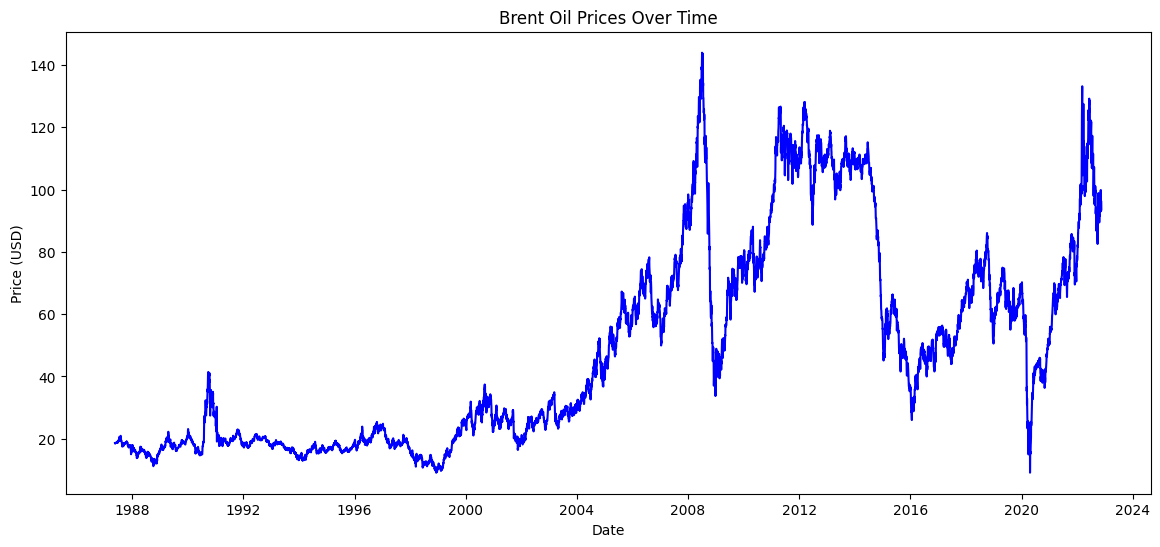

2025-02-21 19:56:41,130 - INFO - Time series plot generated successfully.


In [8]:
# Plot the time series of Brent oil prices
processor.plot_time_series()

2025-02-21 19:56:41,139 - INFO - Performing seasonal decomposition.


<Figure size 1400x1000 with 0 Axes>

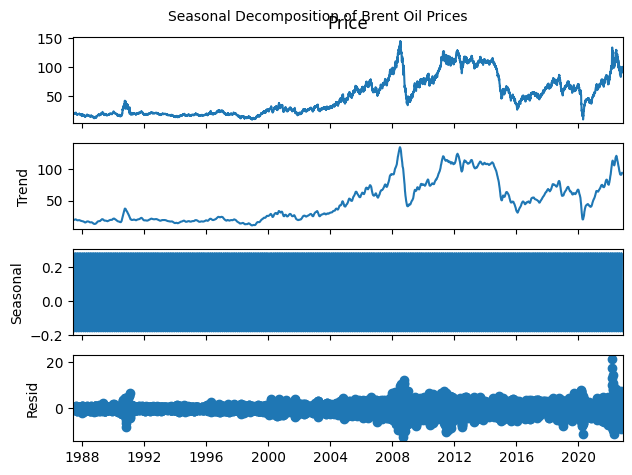

In [9]:
processor.seasonal_decomposition()

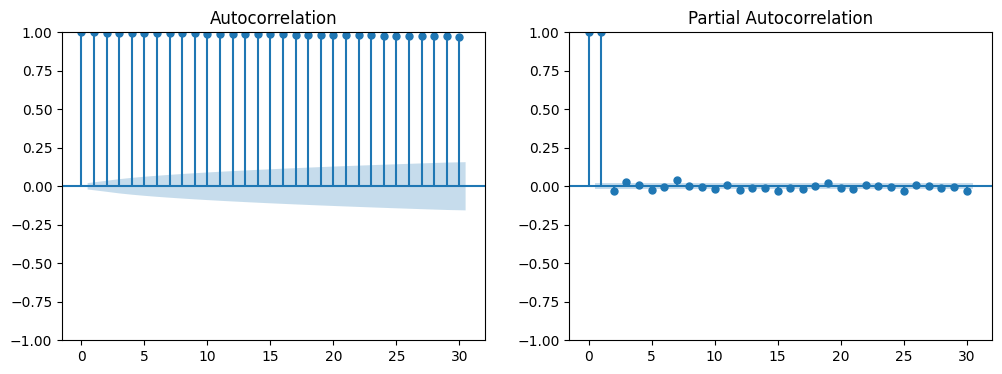

2025-02-21 19:56:41,705 - INFO - ACF and PACF plots generated successfully.


In [10]:
processor.plot_acf_pacf()

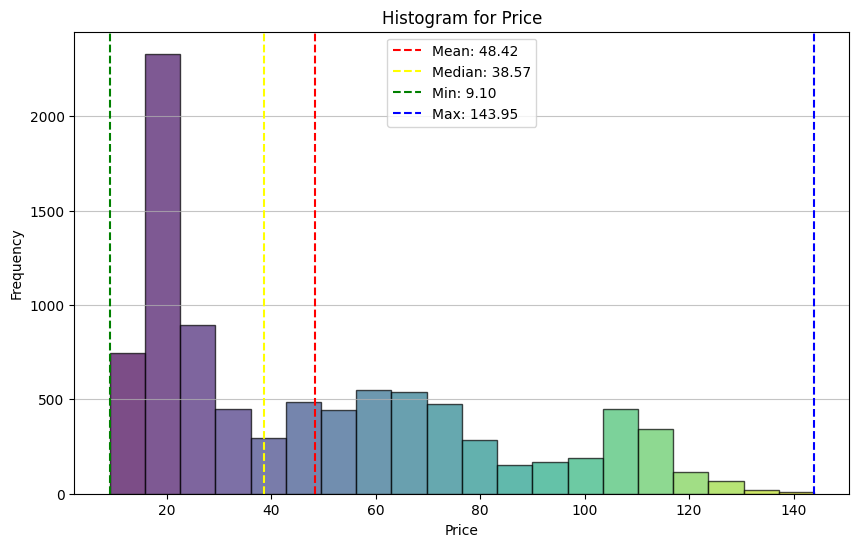

2025-02-21 19:56:41,932 - INFO - Histogram plot generated successfully with statistics and colormap.


In [11]:
processor.plot_histogram()

### 2. Stationarity Check:
- Check if the data is stationary using the Augmented Dickey-Fuller (ADF) test, which is necessary for ARIMA.

##### Before applying any statistical model on a Time Series, the series has to be staionary, which means that, over different time periods:-

- **a)** It should have constant mean.
- **b)** It should have constant variance or standard deviation.
- **c)** Auto-covariance should not depend on time.

2025-02-21 19:56:41,940 - INFO - Performing Augmented Dickey-Fuller test for stationarity.
2025-02-21 19:56:42,763 - INFO - ADF Statistic: -1.9938560113924666
2025-02-21 19:56:42,764 - INFO - p-value: 0.2892735048934033
2025-02-21 19:56:42,766 - INFO - Data is non-stationary; applying first differencing.


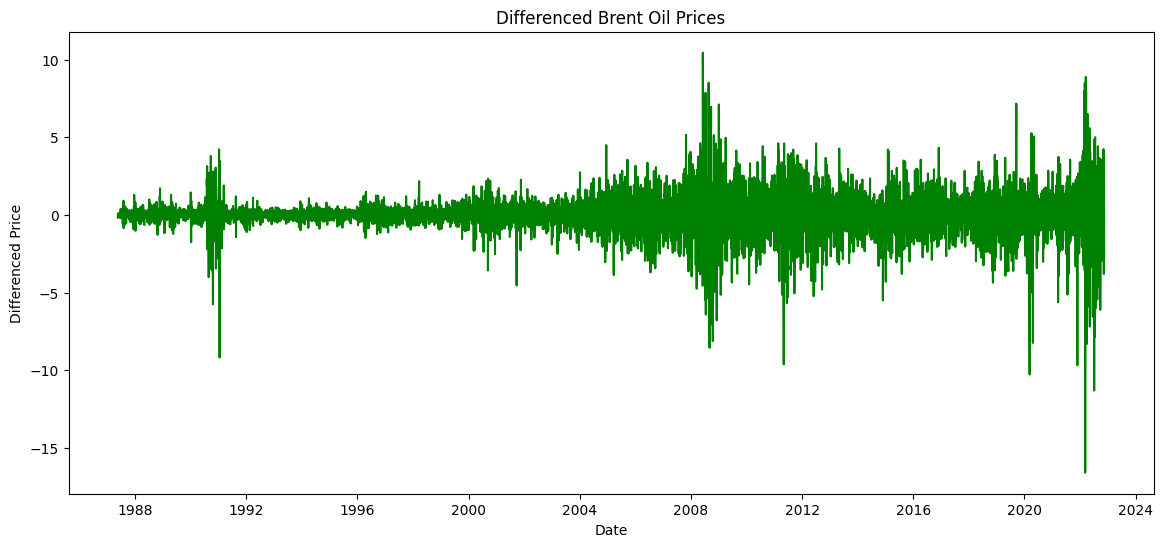

In [12]:
processor.check_stationarity()

### Change Point Analysis

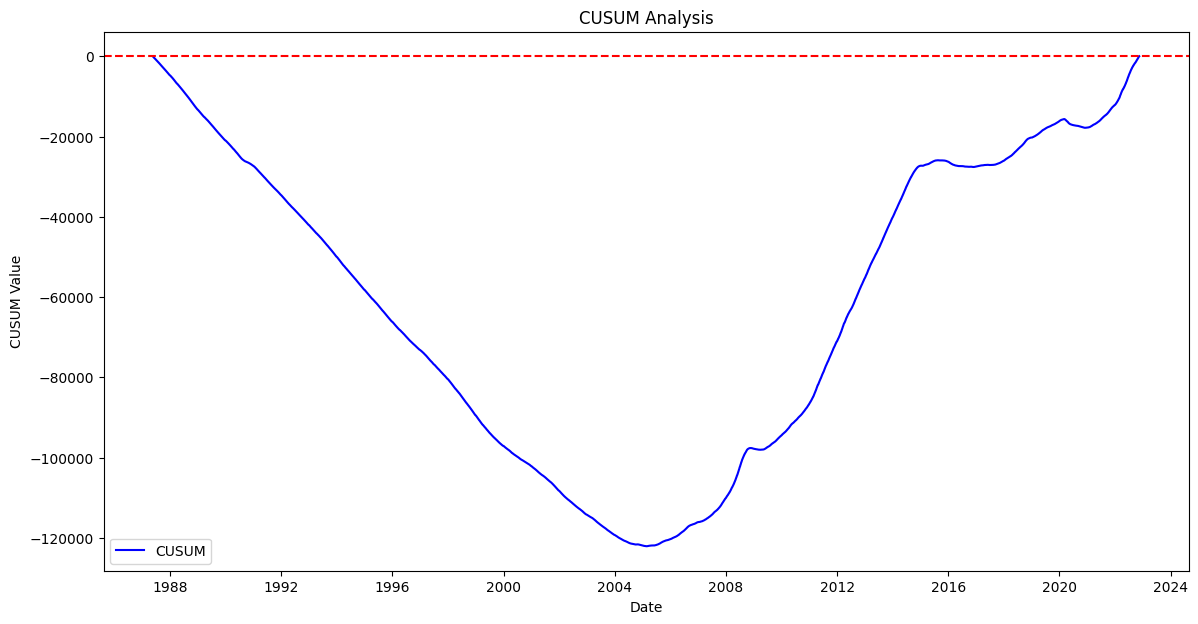

In [13]:
# Call CUSUM Method
processor.plot_cusum()

2025-02-21 19:56:43,128 - INFO - Performing change point analysis.


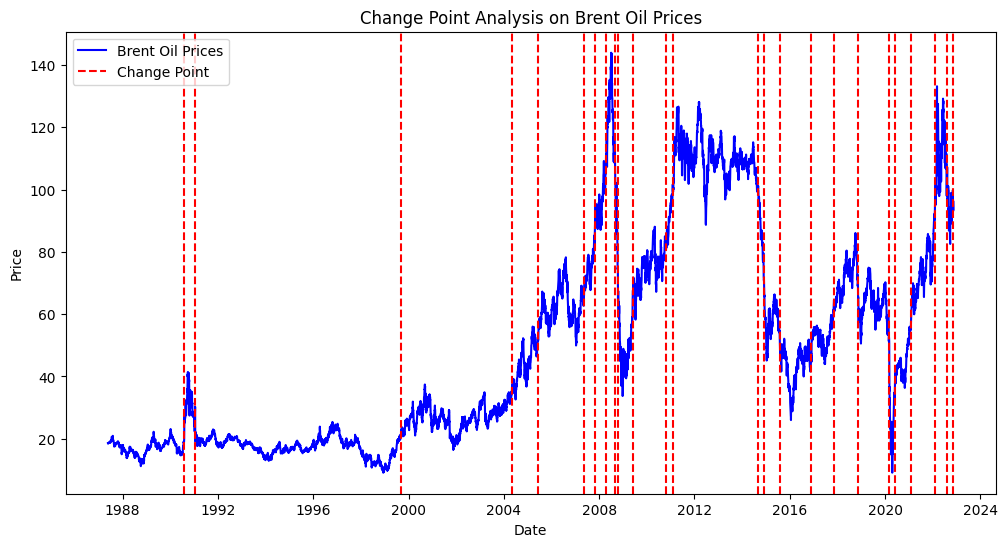

In [14]:
# apply change point analysis
processor.change_point_analysis()